# Pandas 2 - Trabalhando com modelagem de dados

<br>
<img src="img/modelagem_pandas.png">
<br>

Python é a linguagem preferida para *data scientists*, pois fornece o maior ecossistema entre as linguagens de programação e a profundidade de suas bibliotecas de computação científica é muito boa.

Entre suas bibliotecas de computação científica, o **Pandas** está entre as mais úteis para operações de *Data Science*. Juntamente com o Scikit-learn (que vamos aprender mais adiante), o **Pandas** fornece quase tudo o que é necessário para um trabalho de qualidade na modelagem estatística de um *DataSet*. Esta aula se concentra em fornecer maneiras de manipulação de dados em Python, com a finalidade de dar fluência ao aprendizado desta linguagem, e aumentar a familiaridade com os recursos do **Pandas**. 

Dentro desta proposta de modelagem estatística de dados, passaremos por técnicas básicas de manipulação de dados, como segue.

- Leitura do DataSet e reconhecimento dos dadso
- Tratamento de variável quantitativa contínua (salário) com preenchiemnto de NaNs e aplicação de LOG (para correção de assimetria da distribuição)
- Tratamento e análise de variável quantitativa discreta (idade, anos de estudo, região, cor/raça, estado civil, sexo)
- **Desafio: os homens ganham mais que as mulheres?**

In [147]:
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

import warnings
warnings.filterwarnings("ignore")

# Leitura do DataSet e reconhecimento das variáveis

In [375]:
%time df = pd.read_csv(r'./data/data.zip')

CPU times: user 143 ms, sys: 30.9 ms, total: 174 ms
Wall time: 173 ms


In [376]:
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [377]:
df.tail()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
66465,66465,5.311702e+10,34,mulher,5.0,Branca,NaN,1.0,centro-oeste
66466,66466,5.311702e+10,40,homem,5.0,Parda,2425.000000,1.0,centro-oeste
66467,66467,5.311702e+10,36,mulher,5.0,Parda,2425.000000,1.0,centro-oeste
66468,66468,5.311702e+10,27,mulher,5.0,Branca,5524.200195,1.0,centro-oeste
66469,66469,5.311702e+10,37,homem,5.0,Preta,460.350006,1.0,centro-oeste


In [378]:
df.shape

(66470, 9)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [380]:
df.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


# Tratamento da variável 'salario'

O Salário é a variável quantitativa contínua que desperta grande interesse denro do banco de dados, tanto para análise quanto para predição (como veremos mais adiante em *Machine Learning*). Por isso, o seu tratamento deve contar com a maior atenção pelo cientista de dados, no sentido de obter a modelagem mais favorável dentro do estudo.

In [381]:
df['salario'].value_counts(dropna=False).nlargest(7)

NaN          18592
 0.0          1841
-1.0          1101
 999999.0      367
 5229.0        277
 7200.0        260
 7560.0        244
Name: salario, dtype: int64

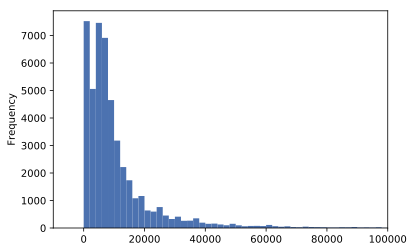

In [382]:
df['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

Podemos perceber que a quantidade de valores nulos é muito grande (18592 em 66470 -> 28%). Além disso, temos uma distribuição bastante assimétrica para a direita. Como boas práticas, vamos preencher os nulos com a mediana, o que deve centralizar a amostra, e utilizar a função logarítmica **LOG** para corrigir a assimetria, e observar a evolução da sua distribuição no histograma.

In [383]:
df['salario'].fillna(df['salario'].median(),inplace=True)

In [384]:
df['salario'].value_counts(dropna=False).nlargest(7)

 7113.599609      18594
 0.000000          1841
-1.000000          1101
 999999.000000      367
 5229.000000        277
 7200.000000        260
 7560.000000        244
Name: salario, dtype: int64

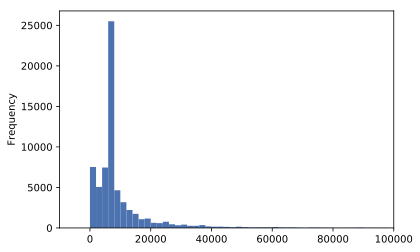

In [385]:
df['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [386]:
df['salario'] = np.log1p(df['salario'])

In [387]:
df['salario'].value_counts(dropna=False).nlargest(7)

 8.869904     18594
 0.000000      1841
-inf           1101
 13.815511      367
 8.562167       277
 8.881975       260
 8.930759       244
Name: salario, dtype: int64

In [388]:
df = df.replace(-np.inf, np.nan)

In [389]:
df['salario'].value_counts(dropna=False).nlargest(7)

 8.869904     18594
 0.000000      1841
NaN            1101
 13.815511      367
 8.562167       277
 8.881975       260
 8.930759       244
Name: salario, dtype: int64

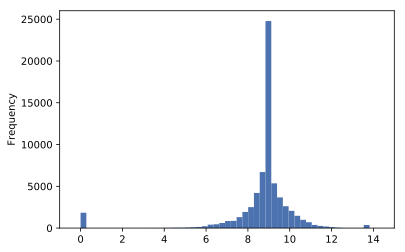

In [391]:
df['salario'].plot.hist(bins=50, xlim=(-1, 15))

Podemos observar que, apresar do pico central, a distribuição da amostra parece normalizada, ou semelhante à uma distribuição Gaussiana, como veremos mais adiante.

# Tratamento da variável 'idade'

A idade é uma variável quantitativa discreta que não apresenta valores faltantes (*missind values*). Vamos explorara os valores e a distribuição dos dados.

In [288]:
df.idade.value_counts(dropna=False).nlargest(7)

20    2104
28    2056
26    2040
22    2034
27    2017
23    2014
25    2014
Name: idade, dtype: int64

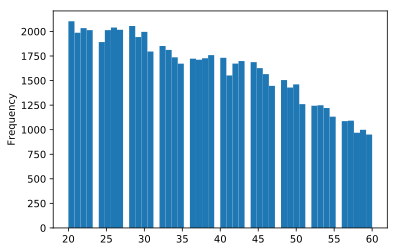

In [216]:
df.idade.plot.hist(bins=50)

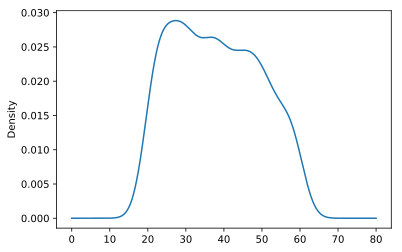

In [217]:
df['idade'].sample(1000).plot.kde()

Como a distribuição apresenta alguma assimetria à direita, podemos pensar em utilizar a função **LOG**, de acordo com as boas práticas, e observar a evolução do seu comportamento.

In [218]:
df['idade'] = np.log(df['idade'])

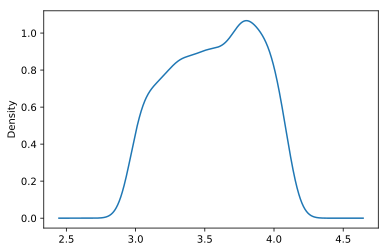

In [219]:
df['idade'].sample(1000).plot.kde()

# Tratando a variável 'anos_estudo'

Também trata-se de uma variável quantitativa discreta, com valores faltantes (*missing values*) ou NaNs estatísticamente insignificante (434 em 66470 -> 0.65%)

In [220]:
df.anos_estudo.value_counts(dropna=False)

 5.0     23349
 11.0    16790
 15.0     5636
 8.0      5017
 10.0     2704
 7.0      2612
 12.0     2610
 9.0      2474
 6.0      2237
 13.0     1348
 14.0     1259
NaN        434
Name: anos_estudo, dtype: int64

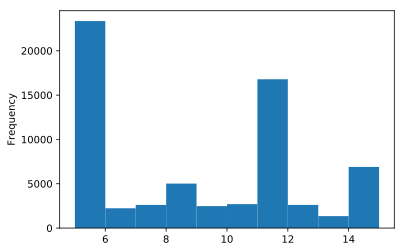

In [221]:
df.anos_estudo.plot.hist(bins=10)

Observamos picos de dados nos anos de conclusão das etapas do processo formal de educação em 5 anos (ensino primário), 9 anos (ensino fundamental), 11 anos (ensino médio) e 15 anos (ensino superior).

# Tratamento da variável 'regiao

A variável da região pode ser classificada como qualitativa nominal com 5 categorias. Observamos que a opção do **nosdeste** está muito reduzida, o que indica possivelmente a presença de um viés (**Viés** ou tendência é um peso desproporcional a favor ou contra uma coisa, pessoa ou grupo comparado a outro, geralmente de uma maneira considerada injusta. *fonte: Wikipedia*).

In [222]:
df.regiao.value_counts(dropna=False)

sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
nordeste            5
Name: regiao, dtype: int64

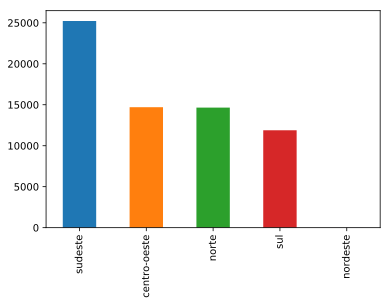

In [223]:
df.regiao.value_counts().plot(kind='bar')

# Tratamento da variável cor/raca

Também trata-se de uma variável qualitativa nominal com 5 categorias, com número de valores faltantes ou *missing values* insignificante. Como boas práticas, vamos eliminar o caracter de barra ( / ) do título para evitar erros de processamento computacional.

In [242]:
df.rename(columns={'cor/raca':'cor_raca'},inplace=True)

In [243]:
df.columns

Index(['Unnamed: 0', 'id', 'idade', 'sexo', 'anos_estudo', 'cor_raca',
       'salario', 'estado_civil', 'regiao'],
      dtype='object')

In [244]:
df['cor_raca'].value_counts(dropna=False)

Branca      31689
Parda       28370
Preta        5249
Indigena      597
Amarela       323
NaN           242
Name: cor_raca, dtype: int64

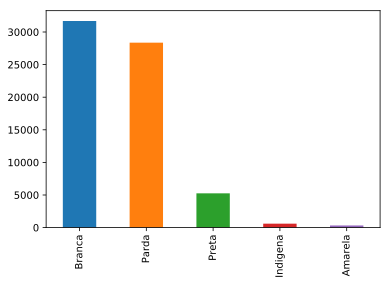

In [245]:
df.cor_raca.value_counts().plot(kind='bar')

# Tratamento da variável 'estado_civil'

Trata-se de uma variável binária (duas categorias), sem *missing values*. O fato mais curioso é que não está explicito qual a representação dos valores encontrados, ou seja, quais opções correspondem aos números 0.0 e 1.0. Geralmente os bancos de dados tem uma dicionário ou memorial descritivo com informações complementares, como por exemplo quais valores equivalem a solteiros e casados, ou alguma outra opção.

In [248]:
df['estado_civil'].value_counts(dropna=False)

1.0    39066
0.0    27404
Name: estado_civil, dtype: int64

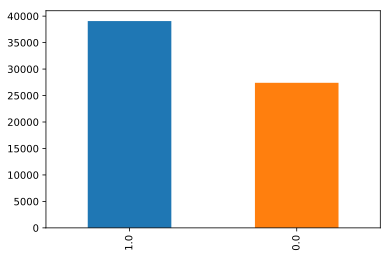

In [249]:
df.estado_civil.value_counts().plot(kind='bar')

# Tratando da variável 'sexo'

Também trata-se de uma variável binária (duas categorias), e sem *mising values*. Além disso, também apresenta um fato curioso de 72 observações dentro de uma terceira categoria denominada 'gestante'. Trataremos destes valores com a substituição por 'mulher'.

In [250]:
df['sexo'].value_counts(dropna=False)

mulher      33607
homem       32791
gestante       72
Name: sexo, dtype: int64

In [254]:
df = df.replace('gestante', 'mulher')

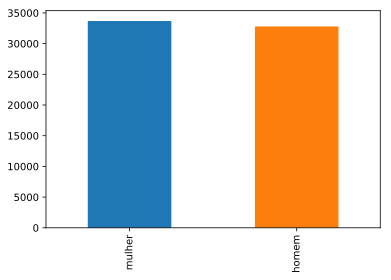

In [255]:
df.sexo.value_counts().plot(kind='bar')

# Desafio: os homens ganham mais do que as mulheres?



O objetivo deste desafio é trabalhar com os conceitos de **Medidas de Centralidade** (média, moda, mediana), e a partir dos resultados, fazer uma análise do comportamento da variável salário.

Como na nossa modelagem fizemos muitas alterações nos dados, vamos começar do zero lendo novamente o arquivo original.

In [336]:
%time df = pd.read_csv(r'./data/data.zip')

CPU times: user 149 ms, sys: 34.4 ms, total: 184 ms
Wall time: 186 ms


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [338]:
df['sexo'].value_counts(dropna=False)

mulher      33607
homem       32791
gestante       72
Name: sexo, dtype: int64

In [339]:
df = df.replace('gestante', 'mulher')

In [340]:
df['sexo'].value_counts(dropna=False)

mulher    33679
homem     32791
Name: sexo, dtype: int64

## Separando os dados em dois DataFrames distintos (homem e mulher)

In [341]:
df_homem = df[df['sexo'] == 'homem']
df_mulher = df[df['sexo'] == 'mulher']

## Testando as hipóteses de salário maior para os homens para média, mediana e moda

In [342]:
media_salario_homem = df_homem['salario'].mean()
mediana_salario_homem = df_homem['salario'].median()
moda_salario_homem = df_homem['salario'].idxmax()

media_salario_mulher = df_mulher['salario'].mean()
mediana_salario_mulher = df_mulher['salario'].median()
moda_salario_mulher = df_mulher['salario'].idxmax()

In [343]:
media_salario_homem > media_salario_mulher

True

In [344]:
mediana_salario_homem > mediana_salario_mulher

True

In [345]:
moda_salario_homem > moda_salario_mulher

False

In [346]:
print('Salário médio homens =',"%.2f"% media_salario_homem,'Salário médio mulheres =',"%.2f"% media_salario_mulher)
print('Salário mediano homens =',"%.2f"% mediana_salario_homem,'Salário mediano mulheres =',"%.2f"% mediana_salario_mulher)
print('Salário mais frequente homens =',"%.2f"% moda_salario_homem,'Salário mais frequente mulheres =',"%.2f"% moda_salario_mulher)

Salário médio homens = 22650.38 Salário médio mulheres = 15590.65
Salário mediano homens = 8400.00 Salário mediano mulheres = 5562.00
Salário mais frequente homens = 386.00 Salário mais frequente mulheres = 1099.00


Concluimos que na média os homens ganham mais, e segundo a mediana também. Porém o salários mais frequente (moda) é maios para as mulheres.

## No histograma fica claro que os homens tem salário maior que as mulheres

In [347]:
df_homem.dropna(inplace=True)
df_mulher.dropna(inplace=True)

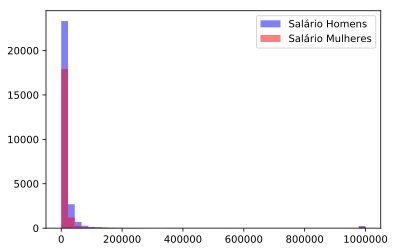

In [353]:
from matplotlib import pyplot

bins = 45

ax = pyplot.hist(df_homem['salario'], bins, alpha=0.5, label='Salário Homens',color='blue')
ax = pyplot.hist(df_mulher['salario'], bins, alpha=0.5, label='Salário Mulheres',color='red')

pyplot.legend(loc='upper right')
pyplot.show()